In [12]:
#Music Recommender System

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [14]:
#Reading data
song_df = pd.read_csv("./data/data.csv")
genre_df = pd.read_csv("./data/data_by_genres.csv")
year_df = pd.read_csv("./data/data_by_year.csv")

In [15]:
#EDA
#getting info about the datasets
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [16]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            3232 non-null   object 
 1   acousticness      3232 non-null   float64
 2   danceability      3232 non-null   float64
 3   duration_ms       3232 non-null   float64
 4   energy            3232 non-null   float64
 5   instrumentalness  3232 non-null   float64
 6   liveness          3232 non-null   float64
 7   loudness          3232 non-null   float64
 8   speechiness       3232 non-null   float64
 9   tempo             3232 non-null   float64
 10  valence           3232 non-null   float64
 11  popularity        3232 non-null   float64
 12  key               3232 non-null   int64  
 13  mode              3232 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.6+ KB


In [17]:
year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              102 non-null    int64  
 1   acousticness      102 non-null    float64
 2   danceability      102 non-null    float64
 3   duration_ms       102 non-null    float64
 4   energy            102 non-null    float64
 5   instrumentalness  102 non-null    float64
 6   liveness          102 non-null    float64
 7   loudness          102 non-null    float64
 8   speechiness       102 non-null    float64
 9   tempo             102 non-null    float64
 10  valence           102 non-null    float64
 11  popularity        102 non-null    float64
 12  key               102 non-null    int64  
 13  mode              102 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.3 KB


In [18]:
#Preproccesing
#Dropping NA values in the dataset
# song_df.dropna(inplace=True)
# song_df.drop(["year", "time_signature"], axis="columns", inplace=True)
# song_df.head()

In [19]:
# song_df['artist-mod'] = song_df['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))
# song_df["artist-mod"].tail(15)

In [20]:
# song_df['artist-mod'][song_df['artist-mod'].apply(lambda x: not x)]

In [21]:
# song_df['artist-new'] = song_df['artists'].apply(lambda x: re.findall('\"(.*?)\"',x))
# song_df['artist-info'] = np.where(song_df['artist-mod'].apply(lambda x: not x), song_df['artist-new'], song_df['artist-mod'])
# song_df.tail(8)

In [22]:
# song_df.drop(["artists", "artist-mod", "artist-new"], axis="columns", inplace=True)
# song_df['artist-title'] = song_df.apply(lambda row: row["artist-info"][0] + "-" + row["name"], axis=1)

In [23]:
# song_df.drop_duplicates("artist-title")
# song_df.sort_values(["artist-title"], ascending=True, inplace=True)

In [24]:

song_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [26]:
#We don't need columns like 'id', 'artists', etc for visualizing the data or training models.
#Therefore, we shall drop them from all datasets
non_numeric_cols = ['artists', 'id', 'release_date', 'name']

song_df_num = song_df.copy()
song_df_num.drop(columns=non_numeric_cols, inplace=True)

In [27]:
genre_df.head()
#As genre dataset has no non-numerical values except the genre itself, we do not drop any columns

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In [30]:
year_df.head()
#Similarly, we do not drop any columns from year dataset either

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [37]:
#Data visualization
import plotly.express as px

observe_features = ['acousticness', 'energy', 'instrumentalness', 'liveness']

fig = px.scatter(year_df, x = 'year', y = observe_features)

fig.show()

In [40]:
fig2 = px.scatter(year_df, x = 'year', y = 'tempo')

fig2.show()

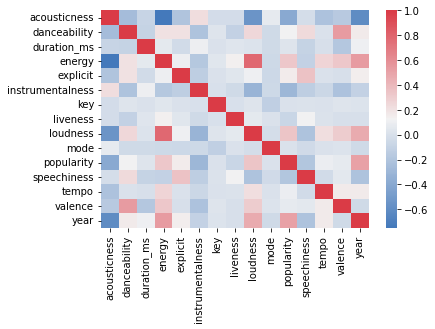

In [45]:
#Checking correlation for the dataset
corr_mat = song_df_num.corr()

cmap_set = sns.diverging_palette(250, 10, as_cmap=True)

figure = sns.heatmap(corr_mat, cmap=cmap_set)